In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [71]:
hetero = pd.read_csv('../Data/Heteromers/protList.tab')
homome = pd.read_table('../Data/Homomers/protList.tab')

In [72]:
ls ../Data/Homomers/Surface/5

ls: cannot access '../Data/Homomers/Surface/5': No such file or directory


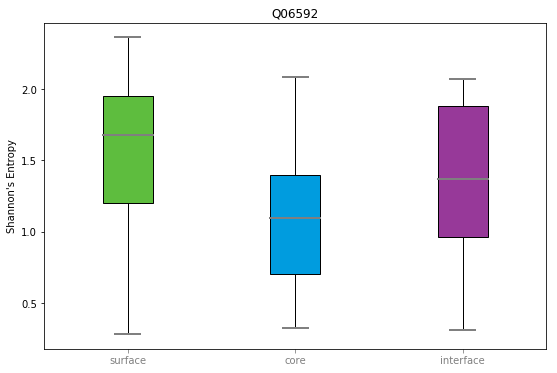

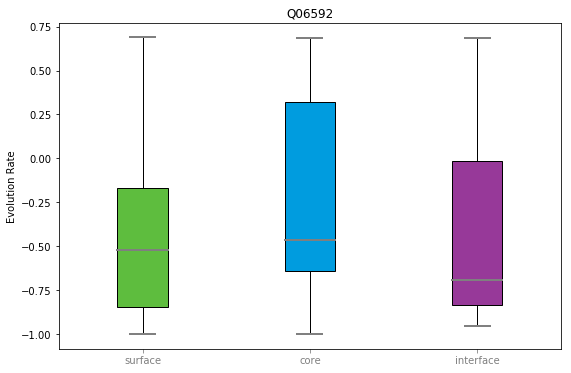

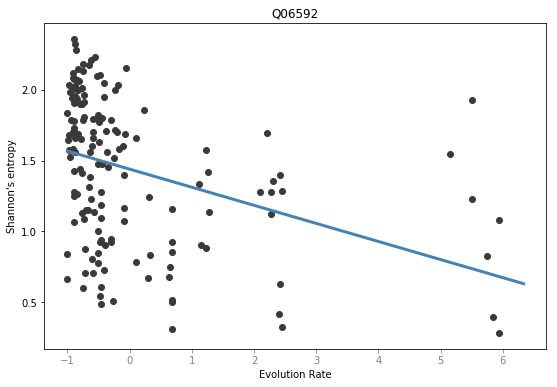

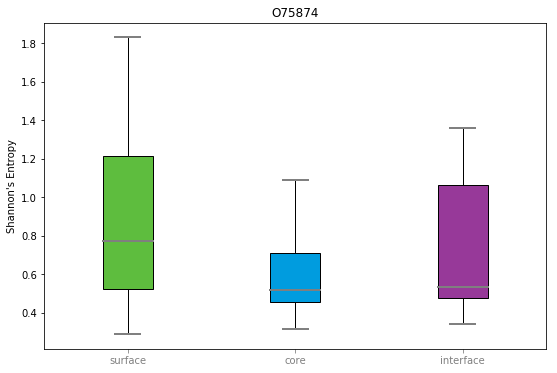

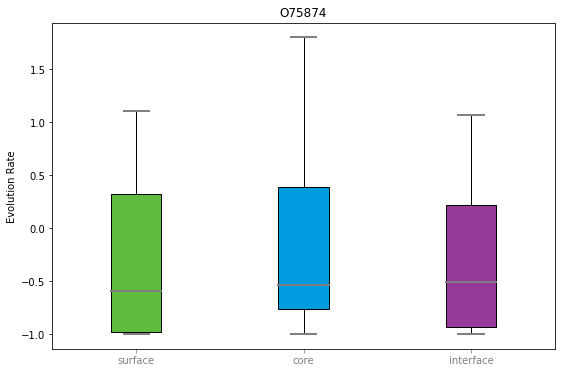

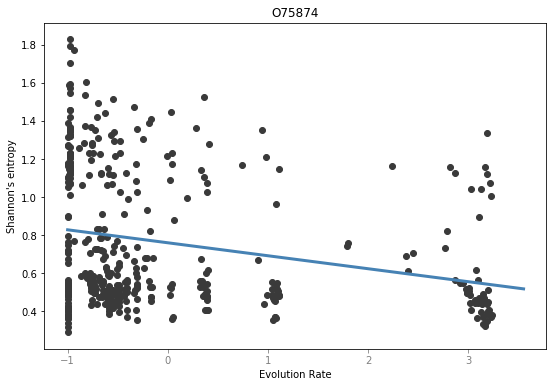

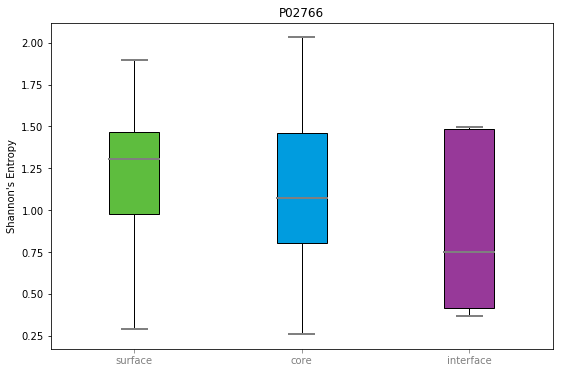

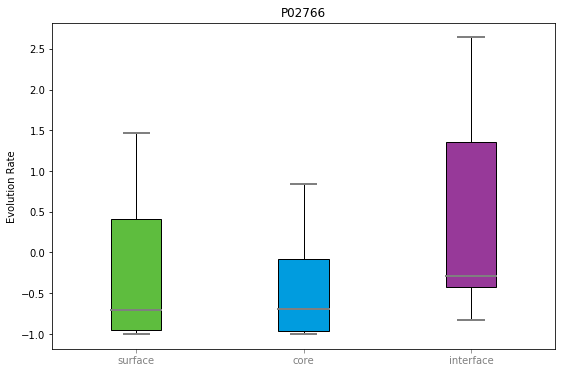

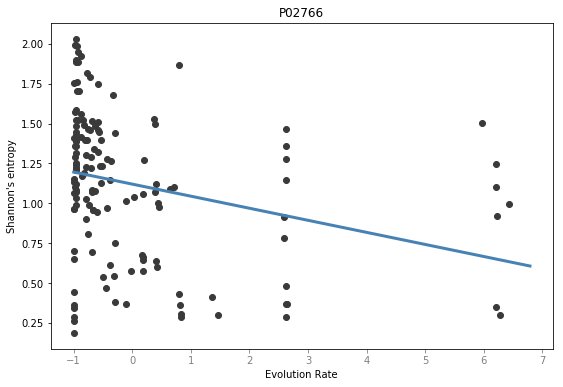

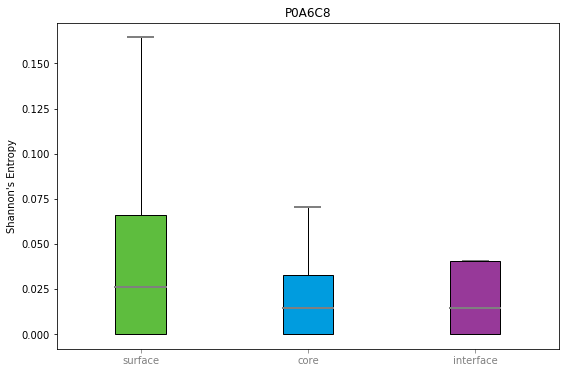

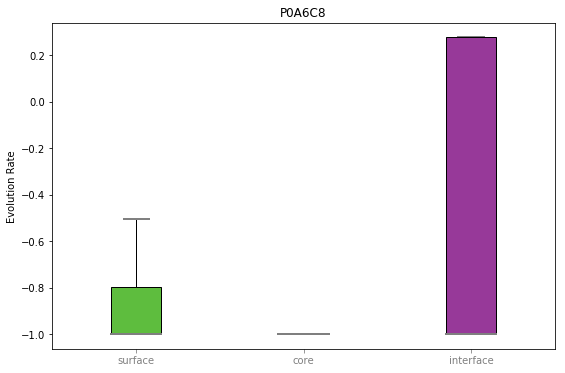

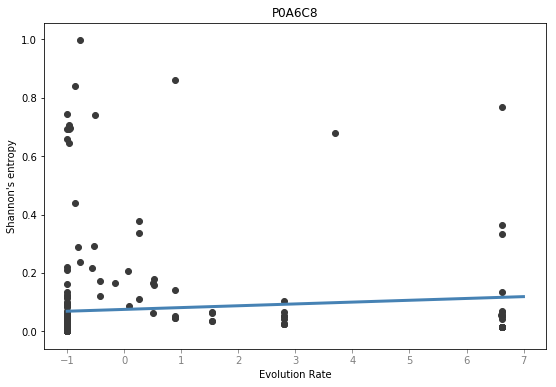

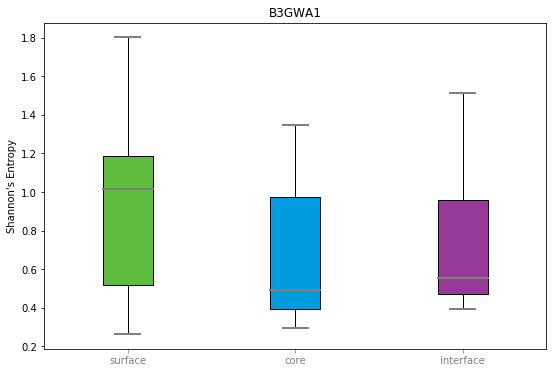

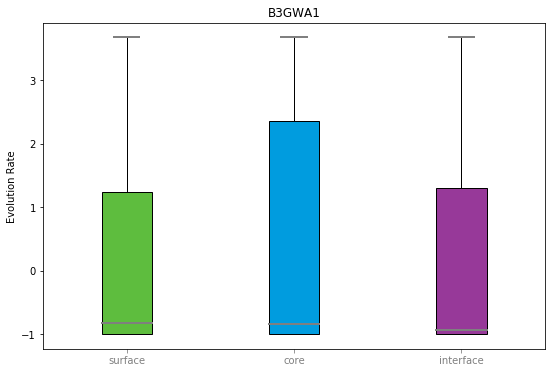

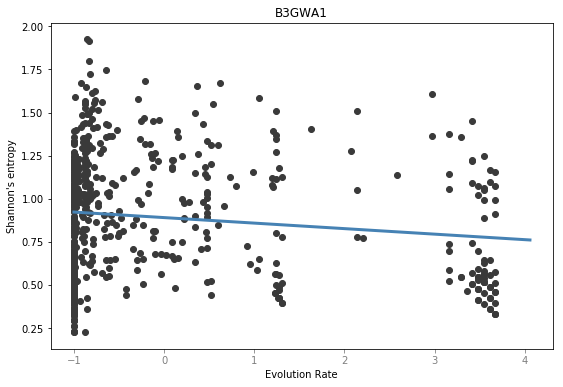

In [74]:
for i in homome.index:
    code = homome.iloc[i]['UniID']
    pdb = homome.iloc[i]['PDB']
    f = homome.iloc[i]['chain']
    t = homome.iloc[i]['to']

    generatePlotHomo(code, pdb, f, t)

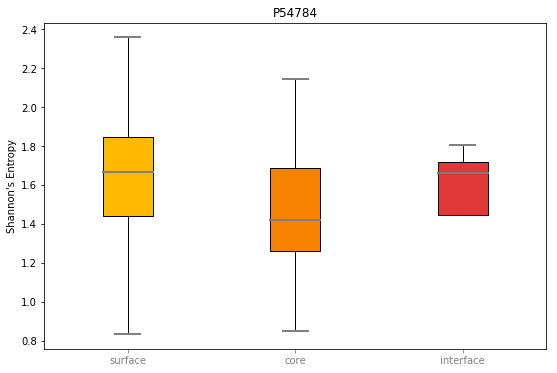

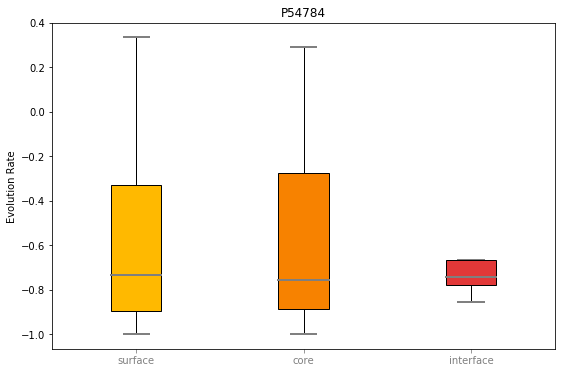

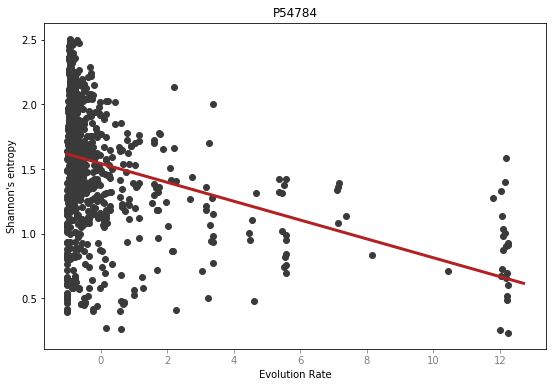

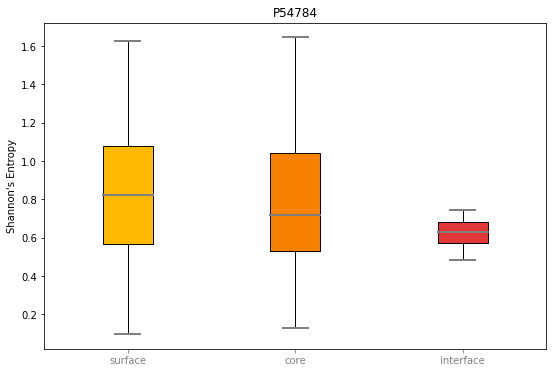

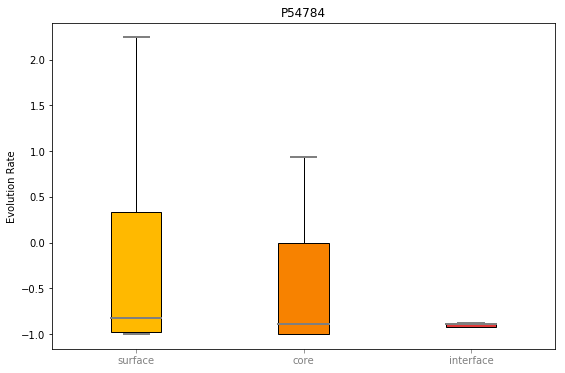

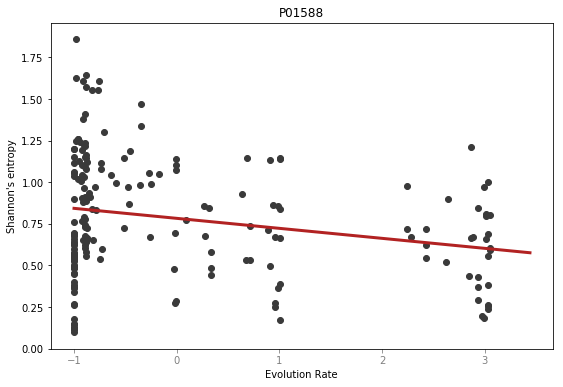

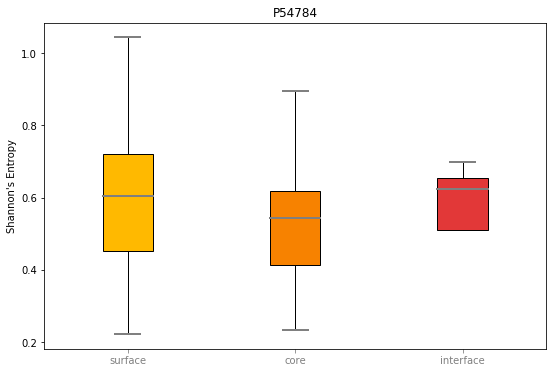

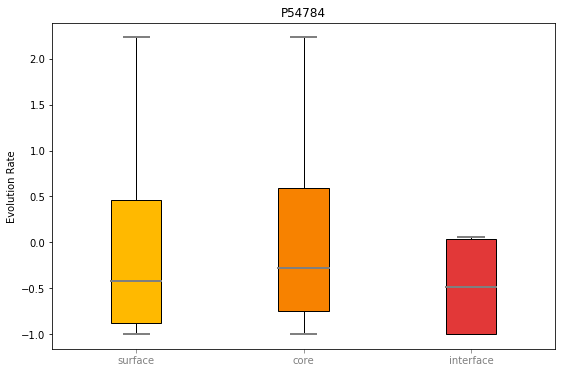

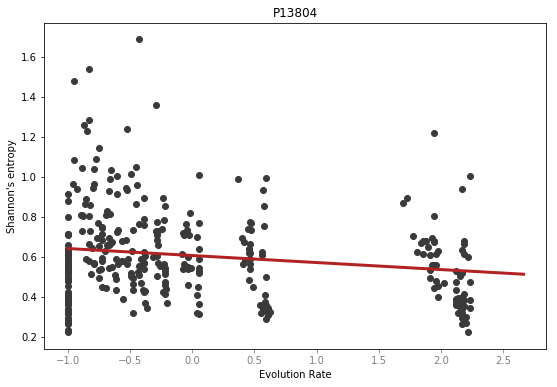

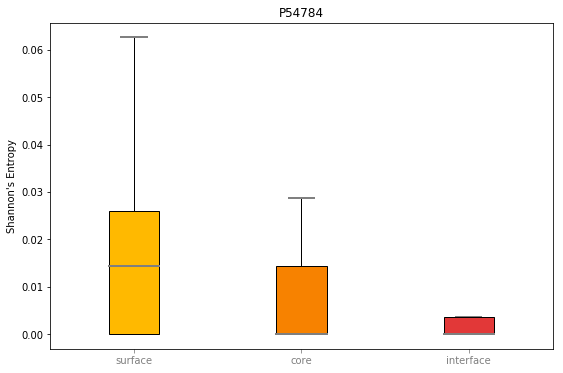

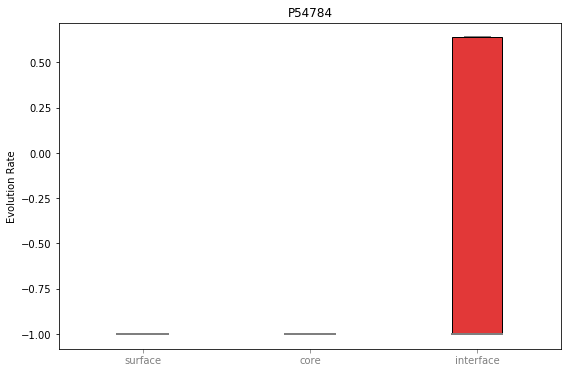

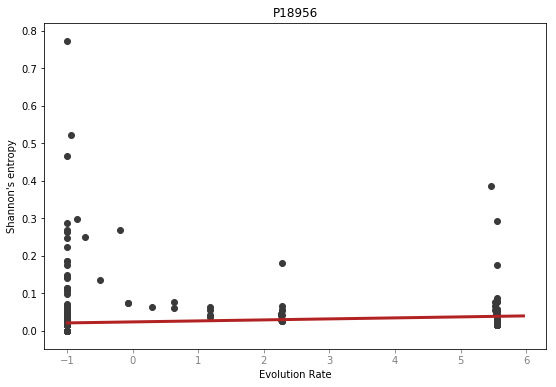

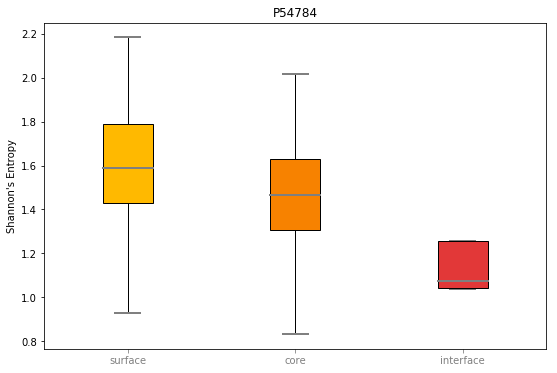

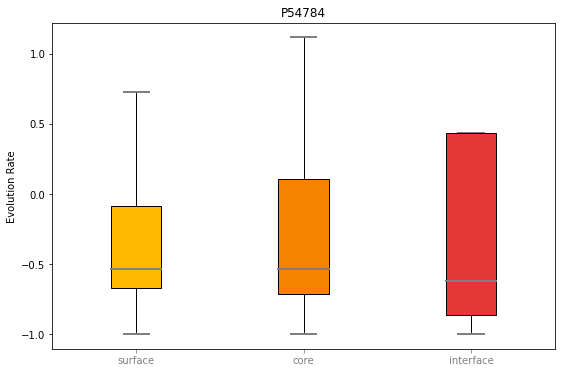

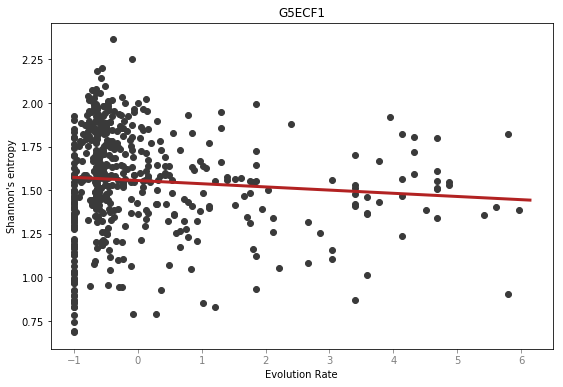

In [76]:
for i in hetero.index:
    code = hetero.iloc[i]['UniID']
    pdb = hetero.iloc[i]['PDB']
    f = hetero.iloc[i]['chain']
    t = hetero.iloc[i]['to']
    
    generatePlotHetero(code, pdb, f, t)

In [54]:
def generatePlotHomo(code, pdb, f, t):
    shan = pd.read_table('../Data/Homomers/'+code+'.shannon')
    rate = pd.read_table('../Data/Homomers/'+code+'.rate')
    data = pd.concat([shan, rate], axis=1)

    surf = pd.read_table('../Data/Homomers/Surface/'+pdb+'_'+ f + '.surf')
    intr = pd.read_table('../Data/Homomers/'+pdb+'.interfaces')


    posi = tuple(surf['pos'])
    
    dataDic = {}
    for i in data['pos'].index:
        dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
    surfDic = {} 
    for i in surf['pos'].index:
        surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])
    
    inter = set(intr['pos'])
    
    # Plot Entropy 
    
    surfHist = tuple(dataDic[i][0] for i in posi if surfDic[i] == 1 and i in dataDic and i not in inter)
    coreHist = tuple(dataDic[i][0] for i in posi if surfDic[i] == 0 and i in dataDic and i not in inter)
    intrHist = tuple(dataDic[i][0] for i in posi if i in inter)
    
    

    data_to_plot = (surfHist, coreHist, intrHist)
    # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))

    plt.rcParams['lines.linewidth']=3
    plt.rcParams['axes.facecolor']='white'
    plt.rcParams['xtick.color']='gray'

    # Create an axes instance
    ax = fig.add_subplot(111)

    # Create the boxplot
    bp = ax.boxplot(data_to_plot, showfliers=False, patch_artist=True)

    for cap in bp['caps']:
        cap.set(color='grey', linewidth=2)

    colors = ('#5EBD3E', '#009CDF', '#973999')
    for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
 
    ## change color and linewidth of the medians
    for median in bp['medians']:
        median.set(color='#7f7f7f', linewidth=2)
    plt.xticks((1, 2, 3), ['surface', 'core', 'interface'])
    plt.ylabel("Shannon's Entropy")
    plt.title(code)

    # Save the figure
    #fig.savefig('o75874_box_shannon.png', bbox_inches='tight')
    plt.show()
    
    
    ## PLOT RATIO!!
    
    surfHist = tuple(dataDic[i][1] for i in surfDic if surfDic[i] == 1 and i in dataDic and i not in inter)
    coreHist = tuple(dataDic[i][1] for i in surfDic if surfDic[i] == 0 and i in dataDic and i not in inter)
    intrHist = tuple(dataDic[i][1] for i in surfDic if i in inter)


    data_to_plot = (surfHist, coreHist, intrHist)
    # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))


    plt.rcParams['lines.linewidth']=3
    plt.rcParams['axes.facecolor']='white'
    plt.rcParams['xtick.color']='gray'

    # Create an axes instance
    ax = fig.add_subplot(111)

    # Create the boxplot
    bp = ax.boxplot(data_to_plot, showfliers=False, patch_artist=True)

    for cap in bp['caps']:
        cap.set(color='grey', linewidth=2)

    colors = ('#5EBD3E', '#009CDF', '#973999')
    for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)

    ## change color and linewidth of the medians
    for median in bp['medians']:
        median.set(color='#7f7f7f', linewidth=2)
    plt.xticks((1, 2, 3), ['surface', 'core', 'interface'])
    plt.ylabel('Evolution Rate')
    plt.title(code)

    # Save the figure
    #fig.savefig('o75874_box_ratio.png', bbox_inches='tight')
    plt.show()

    fig = plt.figure(1, figsize=(9, 6))
    x = data["norm"]
    y = data["entropy"]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    lx = np.arange(start=min(x), stop=max(x)+0.5, step=len(x)/1000)
    ly = tuple(slope*i + intercept for i in lx)
    plt.scatter(x,y, color='#3a3a3a')
    plt.plot(lx, ly, color='steelblue')
    plt.title(code)
    plt.xlabel('Evolution Rate')
    plt.ylabel("Shannon's entropy")
    #fig.savefig('o75874_scatter.png', bbox_inches='tight')
    plt.show()

    """
    for i in surfDic:
        if surfDic[i] == 1 and i not in inter:
            print('color green, resi', i)
        elif surfDic[i] == 0 and i not in inter:
            print('color blue, resi', i)

    for i in inter:
        print('color purple, resi', i)
    """

    

In [64]:
def generatePlotHetero(code, pdb, f, t):
    # hetero
    shan = pd.read_table('../Data/Heteromers/'+code+'.shannon')
    rate = pd.read_table('../Data/Heteromers/'+code+'.rate')
    data = pd.concat([shan, rate], axis=1)


    surf = pd.read_table('../Data/Heteromers/surface/'+pdb+'_'+f+'.surf')
    intr = pd.read_table('../Data/Heteromers/1zhi.interfaces')

    dataDic = {}
    for i in data['pos'].index:
        dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
    surfDic = {} 
    for i in surf['pos'].index:
        surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])

    indft = intr['chain'] == f
    inter = set(intr[indft]['pos'])

    surfHist = tuple(dataDic[i][0] for i in surfDic if surfDic[i] == 1 and i in dataDic and i not in inter)
    coreHist = tuple(dataDic[i][0] for i in surfDic if surfDic[i] == 0 and i in dataDic and i not in inter)
    intrHist = tuple(dataDic[i][0] for i in surfDic if i in inter)

    import matplotlib.pyplot as plt
    import numpy as np

    data_to_plot = (surfHist, coreHist, intrHist)
    # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))


    plt.rcParams['lines.linewidth']=3
    plt.rcParams['axes.facecolor']='white'
    plt.rcParams['xtick.color']='gray'

    # Create an axes instance
    ax = fig.add_subplot(111)

    # Create the boxplot
    bp = ax.boxplot(data_to_plot, showfliers=False, patch_artist=True)

    for cap in bp['caps']:
        cap.set(color='grey', linewidth=2)

    colors = ('#FFB900', '#F78200', '#E23838')
    for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)

    ## change color and linewidth of the medians
    for median in bp['medians']:
        median.set(color='#7f7f7f', linewidth=2)
    plt.xticks((1, 2, 3), ['surface', 'core', 'interface'])
    plt.ylabel("Shannon's Entropy")
    plt.title('P54784')

    # Save the figure
    fig.savefig('p54784_box_shannon.png', bbox_inches='tight')
    plt.show()


    surfHist = tuple(dataDic[i][1] for i in surfDic if surfDic[i] == 1 and i in dataDic and i not in inter)
    coreHist = tuple(dataDic[i][1] for i in surfDic if surfDic[i] == 0 and i in dataDic and i not in inter)
    intrHist = tuple(dataDic[i][1] for i in surfDic if i in inter)


    data_to_plot = (surfHist, coreHist, intrHist)
    # Create a figure instance
    fig = plt.figure(1, figsize=(9, 6))


    plt.rcParams['lines.linewidth']=3
    plt.rcParams['axes.facecolor']='white'
    plt.rcParams['xtick.color']='gray'

    # Create an axes instance
    ax = fig.add_subplot(111)

    # Create the boxplot
    bp = ax.boxplot(data_to_plot, showfliers=False, patch_artist=True)

    for cap in bp['caps']:
        cap.set(color='grey', linewidth=2)

    colors = ('#FFB900', '#F78200', '#E23838')
    for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)

    ## change color and linewidth of the medians
    for median in bp['medians']:
        median.set(color='#7f7f7f', linewidth=2)
    plt.xticks((1, 2, 3), ['surface', 'core', 'interface'])
    plt.ylabel('Evolution Rate')
    plt.title('P54784')

    # Save the figure
    fig.savefig('p54784_box_ratio.png', bbox_inches='tight')
    plt.show()

    fig = plt.figure(1, figsize=(9, 6))
    x = data["norm"]
    y = data["entropy"]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    lx = np.arange(start=min(x), stop=max(x+0.5), step=len(x)/1000)
    ly = tuple(slope*i + intercept for i in lx)
    plt.scatter(x,y, color='#3a3a3a')
    plt.plot()
    plt.plot(lx, ly, color='firebrick')
    plt.title(code)
    plt.xlabel('Evolution Rate')
    plt.ylabel("Shannon's entropy")
    fig.savefig('p54784_scatter.png', bbox_inches='tight')
    plt.show()

    #for i in inter:
    #    print('color firebrick, resi', i)
    """
    for i in surfDic:
        if surfDic[i] == 1:
            print('color yelloworange, resi', i)
        elif surfDic[i] == 0 :
            print('color tv_orange, resi', i)
        """

# HOMOMERS

### Q06592

  chain  pos   aa
0     A  139  TYR
1     A  127  CYS
2     A   74  ASN
3     A  123  SER
4     A  125  TYR


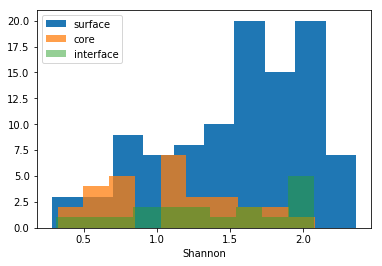

(0.4, 1.6)

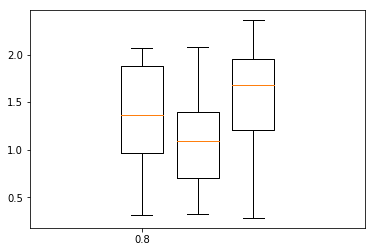

In [11]:
code = 'Q06592'
pdb='1qso_A'

shan = pd.read_table('../Data/Homomers/'+code+'.shannon')
rate = pd.read_table('../Data/Homomers/'+code+'.rate')
data = pd.concat([shan, rate], axis=1)

surf = pd.read_table('../Data/Homomers/Surface/'+pdb+'.surf')

intr = pd.read_table('../Data/Homomers/1qso.interfaces')
print(intr.head())

dataDic = {}
for i in data['pos'].index:
    dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
surfDic = {} 
for i in surf['pos'].index:
    surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])
    
inter = set(intr['pos'])


surfHist = tuple(dataDic[i][0] for i in surfDic if surfDic[i] == 1 and i in dataDic and i not in inter)
coreHist = tuple(dataDic[i][0] for i in surfDic if surfDic[i] == 0 and i in dataDic and i not in inter)
intrHist = tuple(dataDic[i][0] for i in surfDic if i in inter)

plt.hist(surfHist, label='surface', alpha=1)
plt.hist(coreHist, label='core', alpha=0.75)
plt.hist(intrHist, label='interface', alpha=0.5)
plt.legend()
plt.xlabel('Shannon')
plt.show()

plt.boxplot(surfHist, positions=[1.2])
plt.boxplot(coreHist, positions=[1])
plt.boxplot(intrHist, positions=[0.8])
plt.xlim((0.4, 1.6))

# O75874

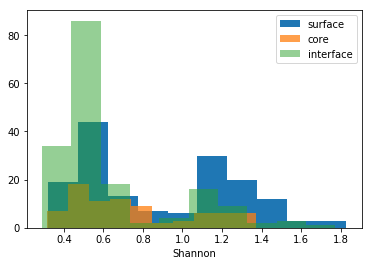

(0.4, 1.6)

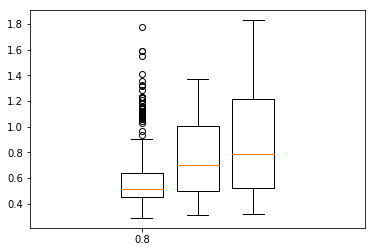

In [100]:
code = 'O75874'
pdb='4kzo_A'

shan = pd.read_table('../Data/Homomers/'+code+'.shannon')
rate = pd.read_table('../Data/Homomers/'+code+'.rate')
data = pd.concat([shan, rate], axis=1)

surf = pd.read_table('../Data/Homomers/Surface/'+pdb+'.surf')

intr1 = pd.read_table('../Data/Homomers/out_4kzo_inter/molecule_1.txt', sep=' ', header=-1, names=['aa', 'pos', 'inter'])
intr2 = pd.read_table('../Data/Homomers/out_4kzo_inter/molecule_2.txt', sep=' ', header=-1, names=['aa', 'pos', 'inter'])

dataDic = {}
for i in data['pos'].index:
    dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
surfDic = {} 
for i in surf['pos'].index:
    surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])
    
intrI = intr1['inter'] == 'I'
inter1 = set(intr1[intrI]['pos'])

intrI = intr2['inter'] == 'I'
inter2 = set(intr2[intrI]['pos'])

surfHist = tuple(dataDic[i][0] for i in surfDic if surfDic[i] == 1 and i in dataDic and i not in inter1 and i not in inter2)
coreHist = tuple(dataDic[i][0] for i in surfDic if surfDic[i] == 0 and i in dataDic and i not in inter1 and i not in inter2)
intrHist = tuple(dataDic[i][0] for i in surfDic if i in inter1 or i in inter2)

plt.hist(surfHist, label='surface', alpha=1)
plt.hist(coreHist, label='core', alpha=0.75)
plt.hist(intrHist, label='interface', alpha=0.5)
plt.legend()
plt.xlabel('Shannon')
plt.show()

plt.boxplot(surfHist, positions=[1.2])
plt.boxplot(coreHist, positions=[1])
plt.boxplot(intrHist, positions=[0.8])
plt.xlim((0.4, 1.6))

# P02766

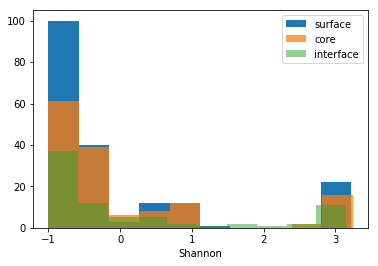

(0.4, 1.6)

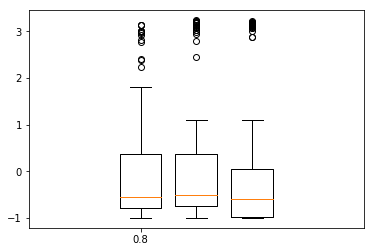

In [98]:
code = 'O75874'
pdb='4kzo_A'

shan = pd.read_table('../Data/Homomers/'+code+'.shannon')
rate = pd.read_table('../Data/Homomers/'+code+'.rate')
data = pd.concat([shan, rate], axis=1)

surf = pd.read_table('../Data/Homomers/Surface/'+pdb+'.surf')

intr1 = pd.read_table('../Data/Homomers/out_4n85_inter/molecule_1.txt', sep=' ', header=-1, names=['aa', 'pos', 'inter'])
intr2 = pd.read_table('../Data/Homomers/out_4n85_inter/molecule_2.txt', sep=' ', header=-1, names=['aa', 'pos', 'inter'])

dataDic = {}
for i in data['pos'].index:
    dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
surfDic = {} 
for i in surf['pos'].index:
    surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])
    
intrI = intr1['inter'] == 'I'
inter1 = set(intr1[intrI]['pos'])

intrI = intr2['inter'] == 'I'
inter2 = set(intr2[intrI]['pos'])

surfHist = tuple(dataDic[i][1] for i in surfDic if surfDic[i] == 1 and i in dataDic and i not in inter1 and i not in inter2)
coreHist = tuple(dataDic[i][1] for i in surfDic if surfDic[i] == 0 and i in dataDic and i not in inter1 and i not in inter2)
intrHist = tuple(dataDic[i][1] for i in surfDic if i in inter1 or i in inter2)

plt.hist(surfHist, label='surface', alpha=1)
plt.hist(coreHist, label='core', alpha=0.75)
plt.hist(intrHist, label='interface', alpha=0.5)
plt.legend()
plt.xlabel('Shannon')
plt.show()

plt.boxplot(surfHist, positions=[1.2])
plt.boxplot(coreHist, positions=[1])
plt.boxplot(intrHist, positions=[0.8])
plt.xlim((0.4, 1.6))

# P0A6C8

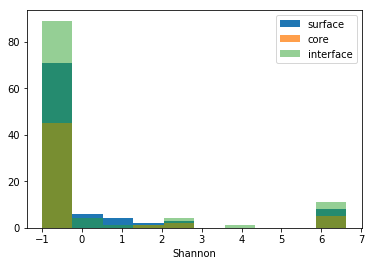

(0.4, 1.6)

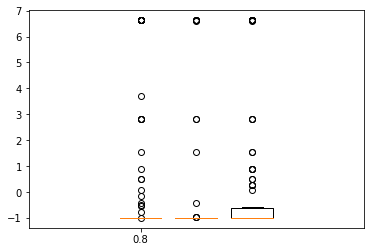

In [99]:
code = 'P0A6C8'
pdb='2x2w_B'

shan = pd.read_table('../Data/Homomers/'+code+'.shannon')
rate = pd.read_table('../Data/Homomers/'+code+'.rate')
data = pd.concat([shan, rate], axis=1)

surf = pd.read_table('../Data/Homomers/Surface/'+pdb+'.surf')

intr1 = pd.read_table('../Data/Homomers/out_2x2w_inter/molecule_1.txt', sep=' ', header=-1, names=['aa', 'pos', 'inter'])
intr2 = pd.read_table('../Data/Homomers/out_2x2w_inter/molecule_2.txt', sep=' ', header=-1, names=['aa', 'pos', 'inter'])

dataDic = {}
for i in data['pos'].index:
    dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
surfDic = {} 
for i in surf['pos'].index:
    surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])
    
intrI = intr1['inter'] == 'I'
inter1 = set(intr1[intrI]['pos'])

intrI = intr2['inter'] == 'I'
inter2 = set(intr2[intrI]['pos'])

surfHist = tuple(dataDic[i][1] for i in surfDic if surfDic[i] == 1 and i in dataDic and i not in inter1 and i not in inter2)
coreHist = tuple(dataDic[i][1] for i in surfDic if surfDic[i] == 0 and i in dataDic and i not in inter1 and i not in inter2)
intrHist = tuple(dataDic[i][1] for i in surfDic if i in inter1 or i in inter2)

plt.hist(surfHist, label='surface', alpha=1)
plt.hist(coreHist, label='core', alpha=0.75)
plt.hist(intrHist, label='interface', alpha=0.5)
plt.legend()
plt.xlabel('Shannon')
plt.show()

plt.boxplot(surfHist, positions=[1.2])
plt.boxplot(coreHist, positions=[1])
plt.boxplot(intrHist, positions=[0.8])
plt.xlim((0.4, 1.6))

# B3GWA1

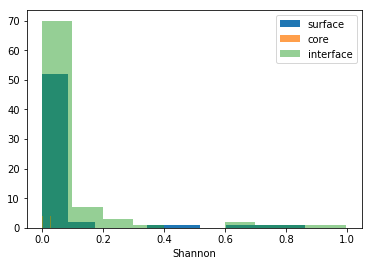

(0.4, 1.6)

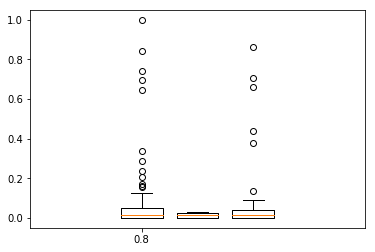

In [78]:
code = 'P0A6C8'
pdb='5ca5_A'

shan = pd.read_table('../Data/Homomers/'+code+'.shannon')
rate = pd.read_table('../Data/Homomers/'+code+'.rate')
data = pd.concat([shan, rate], axis=1)

surf = pd.read_table('../Data/Homomers/Surface/'+pdb+'.surf')

intr1 = pd.read_table('../Data/Homomers/out_5ac5_inter/molecule_1.txt', sep=' ', header=-1, names=['aa', 'pos', 'inter'])
intr2 = pd.read_table('../Data/Homomers/out_5ac5_inter/molecule_2.txt', sep=' ', header=-1, names=['aa', 'pos', 'inter'])

dataDic = {}
for i in data['pos'].index:
    dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
surfDic = {} 
for i in surf['pos'].index:
    surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])
    
intrI = intr1['inter'] == 'I'
inter1 = set(intr1[intrI]['pos'])

intrI = intr2['inter'] == 'I'
inter2 = set(intr2[intrI]['pos'])

surfHist = tuple(dataDic[i][0] for i in surfDic if surfDic[i] == 1 and i in dataDic and i not in inter1 and i not in inter2)
coreHist = tuple(dataDic[i][0] for i in surfDic if surfDic[i] == 0 and i in dataDic and i not in inter1 and i not in inter2)
intrHist = tuple(dataDic[i][0] for i in surfDic if (i in inter1 or i in inter2) and  i in dataDic )

plt.hist(surfHist, label='surface', alpha=1)
plt.hist(coreHist, label='core', alpha=0.75)
plt.hist(intrHist, label='interface', alpha=0.5)
plt.legend()
plt.xlabel('Shannon')
plt.show()

plt.boxplot(surfHist, positions=[1.2])
plt.boxplot(coreHist, positions=[1])
plt.boxplot(intrHist, positions=[0.8])
plt.xlim((0.4, 1.6))

# HETEROMERS

### P18956

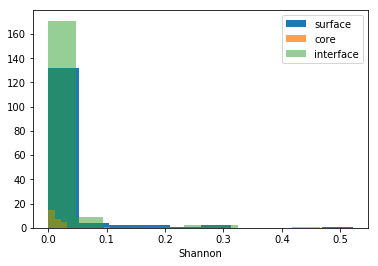

{'boxes': [<matplotlib.lines.Line2D at 0x7f1c22b08be0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1c228657b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1c22c219e8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1c22c21898>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1c22b08d30>,
  <matplotlib.lines.Line2D at 0x7f1c22b085c0>]}

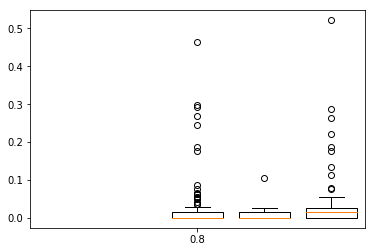

In [81]:
code = 'P18956'
pdb='2e0x_A'
shan = pd.read_table('../Data/Heteromers/'+code+'.shannon')
rate = pd.read_table('../Data/Heteromers/'+code+'.rate')
data = pd.concat([shan, rate], axis=1)

main = readFasta('../Data/Heteromers/'+code+'.fasta')
sele = readFasta('../Data/Heteromers/surface/2e0x_A.fasta')

surf = pd.read_table('../Data/Heteromers/surface/2e0x_A.surf')

intr = pd.read_table('../Data/Heteromers/out_2eOx_inter/molecule_1.txt', sep=' ', header=-1, names=['aa', 'pos', 'inter'])

dataDic = {}
for i in data['pos'].index:
    dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
surfDic = {} 
for i in surf['pos'].index:
    surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])
    
intrI = intr['inter'] == 'I'
inter = set(intr[intrI]['pos'])

surfHist = tuple(dataDic[i][0] for i in surfDic if surfDic[i] == 1 and i in dataDic and i not in inter)
coreHist = tuple(dataDic[i][0] for i in surfDic if surfDic[i] == 0 and i in dataDic and i not in inter)
intrHist = tuple(dataDic[i][0] for i in surfDic if i in inter)

plt.hist(surfHist, label='surface', alpha=1)
plt.hist(coreHist, label='core', alpha=0.75)
plt.hist(intrHist, label='interface', alpha=0.5)
plt.legend()
plt.xlabel('Shannon')
plt.show()
plt.boxplot(surfHist, positions=[1.2])
plt.boxplot(coreHist)
plt.boxplot(intrHist, positions=[0.8])

# P20449

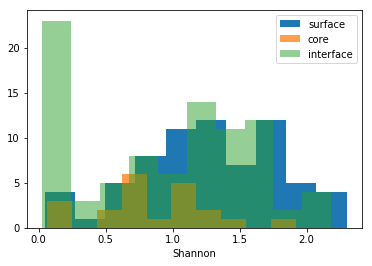

{'boxes': [<matplotlib.lines.Line2D at 0x7f1c226e31d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1c2265b4e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1c2265be80>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1c2265bd30>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1c226e3898>,
  <matplotlib.lines.Line2D at 0x7f1c226e3278>]}

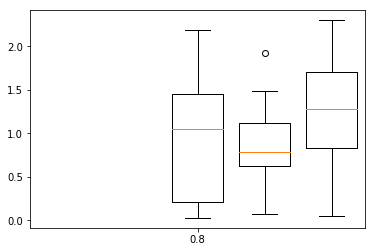

In [83]:
code = 'P20449'
pdb='3peu_A'
shan = pd.read_table('../Data/Heteromers/P20449.shannon')
rate = pd.read_table('../Data/Heteromers/P20449.rate')
data = pd.concat([shan, rate], axis=1)

main = readFasta('../Data/Heteromers/'+code+'.fasta')
sele = readFasta('../Data/Heteromers/surface/3peu_A.fasta')

surf = pd.read_table('../Data/Heteromers/surface/3peu_A.surf')

intr = pd.read_table('../Data/Heteromers/out_3peu_inter/molecule_1.txt', sep=' ', header=-1, names=['aa', 'pos', 'inter'])

dataDic = {}
for i in data['pos'].index:
    dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
surfDic = {} 
for i in surf['pos'].index:
    surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])
    
intrI = intr['inter'] == 'I'
inter = set(intr[intrI]['pos'])

surfHist = tuple(dataDic[i][0] for i in surfDic if surfDic[i] == 1 and i in dataDic and i not in inter)
coreHist = tuple(dataDic[i][0] for i in surfDic if surfDic[i] == 0 and i in dataDic and i not in inter)
intrHist = tuple(dataDic[i][0] for i in surfDic if i in inter)

plt.hist(surfHist, label='surface', alpha=1)
plt.hist(coreHist, label='core', alpha=0.75)
plt.hist(intrHist, label='interface', alpha=0.5)
plt.legend()
plt.xlabel('Shannon')
plt.show()
plt.boxplot(surfHist, positions=[1.2])
plt.boxplot(coreHist)
plt.boxplot(intrHist, positions=[0.8])

# P54784

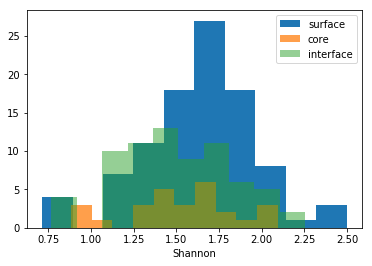

(0.4, 1.6)

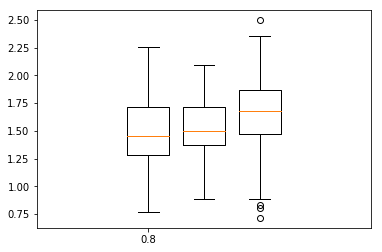

In [44]:
code = 'P54784'
pdb='1zhi_A'
shan = pd.read_table('../Data/Heteromers/'+code+'.shannon')
rate = pd.read_table('../Data/Heteromers/'+code+'.rate')
data = pd.concat([shan, rate], axis=1)

main = readFasta('../Data/Heteromers/P54784.fasta')
sele = readFasta('../Data/Heteromers/surface/1zhi_A.fasta')

surf = pd.read_table('../Data/Heteromers/surface/1zhi_A.surf')

intr = pd.read_table('../Data/Heteromers/out_1zhi_inter/molecule_1.txt', sep=' ', header=-1, names=['aa', 'pos', 'inter'])

dataDic = {}
for i in data['pos'].index:
    dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
surfDic = {} 
for i in surf['pos'].index:
    surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])
    
intrI = intr['inter'] == 'I'
inter = set(intr[intrI]['pos'])

surfHist = tuple(dataDic[i][0] for i in surfDic if surfDic[i] == 1 and i in dataDic and i not in inter)
coreHist = tuple(dataDic[i][0] for i in surfDic if surfDic[i] == 0 and i in dataDic and i not in inter)
intrHist = tuple(dataDic[i][0] for i in surfDic if i in inter)

plt.hist(surfHist, label='surface', alpha=1)
plt.hist(coreHist, label='core', alpha=0.75)
plt.hist(intrHist, label='interface', alpha=0.5)
plt.legend()
plt.xlabel('Shannon')
plt.show()

plt.boxplot(surfHist, positions=[1.2])
plt.boxplot(coreHist, positions=[1])
plt.boxplot(intrHist, positions=[0.8])
plt.xlim((0.4, 1.6))

# P68871

# P01588

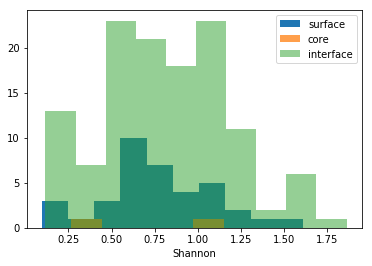

(0.4, 1.6)

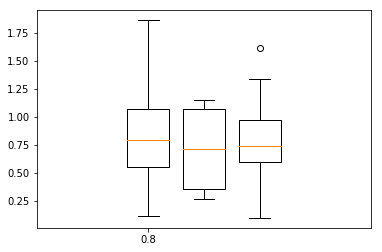

In [34]:
code = 'P01588'
pdb='1eer_A'
shan = pd.read_table('../Data/Heteromers/'+code+'.shannon')
rate = pd.read_table('../Data/Heteromers/'+code+'.rate')
data = pd.concat([shan, rate], axis=1)

main = readFasta('../Data/Heteromers/P01588.fasta')
sele = readFasta('../Data/Heteromers/surface/1eer_A.fasta')

surf = pd.read_table('../Data/Heteromers/surface/1eer_A.surf')

intr = pd.read_table('../Data/Heteromers/out_1eer_interB/molecule_1.txt', sep=' ', header=-1, names=['aa', 'pos', 'inter'])
intr2 = pd.read_table('../Data/Heteromers/out_1eer_interC/molecule_1.txt', sep=' ', header=-1, names=['aa', 'pos', 'inter'])

dataDic = {}
for i in data['pos'].index:
    dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
surfDic = {} 
for i in surf['pos'].index:
    surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])
    
intrI = intr['inter'] == 'I'
inter1 = set(intr[intrI]['pos'])

intrI2 = intr2['inter'] == 'I'
inter2 = set(intr2[intrI2]['pos'])

surfHist = tuple(dataDic[i][0] for i in surfDic if surfDic[i] == 1 and i in dataDic and i not in inter1 and i not in inter2)
coreHist = tuple(dataDic[i][0] for i in surfDic if surfDic[i] == 0 and i in dataDic and i not in inter1 and i not in inter2)
intrHist = tuple(dataDic[i][0] for i in surfDic if i in inter1 or i in inter2)

plt.hist(surfHist, label='surface', alpha=1)
plt.hist(coreHist, label='core', alpha=0.75)
plt.hist(intrHist, label='interface', alpha=0.5)
plt.legend()
plt.xlabel('Shannon')
plt.show()

plt.boxplot(surfHist, positions=[1.2])
plt.boxplot(coreHist, positions=[1])
plt.boxplot(intrHist, positions=[0.8])
plt.xlim((0.4, 1.6))

# P13804

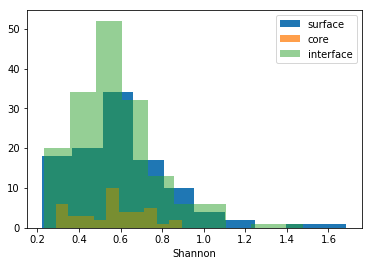

(0.4, 1.6)

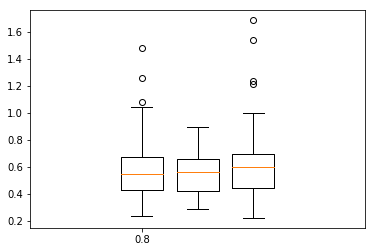

In [88]:
code = 'P13804'
pdb='1efv_A'
shan = pd.read_table('../Data/Heteromers/'+code+'.shannon')
rate = pd.read_table('../Data/Heteromers/'+code+'.rate')
data = pd.concat([shan, rate], axis=1)


surf = pd.read_table('../Data/Heteromers/surface/1efv_A.surf')

intr = pd.read_table('../Data/Heteromers/out_1EFV_inter/molecule_1.txt', sep=' ', header=-1, names=['aa', 'pos', 'inter'])

dataDic = {}
for i in data['pos'].index:
    dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
surfDic = {} 
for i in surf['pos'].index:
    surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])
    
intrI = intr['inter'] == 'I'
inter = set(intr[intrI]['pos'])

surfHist = tuple(dataDic[i][0] for i in surfDic if surfDic[i] == 1 and i in dataDic and i not in inter)
coreHist = tuple(dataDic[i][0] for i in surfDic if surfDic[i] == 0 and i in dataDic and i not in inter)
intrHist = tuple(dataDic[i][0] for i in surfDic if i in inter)

plt.hist(surfHist, label='surface', alpha=1)
plt.hist(coreHist, label='core', alpha=0.75)
plt.hist(intrHist, label='interface', alpha=0.5)
plt.legend()
plt.xlabel('Shannon')
plt.show()

plt.boxplot(surfHist, positions=[1.2])
plt.boxplot(coreHist, positions=[1])
plt.boxplot(intrHist, positions=[0.8])
plt.xlim((0.4, 1.6))

# PoA6t9

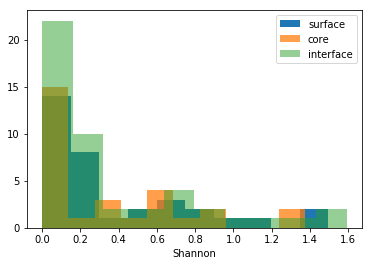

(0.4, 1.6)

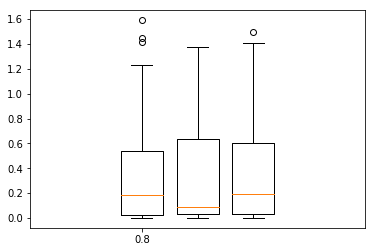

In [96]:
code = 'P0A6T9'
pdb='1efv_A'
shan = pd.read_table('../Data/Heteromers/'+code+'.shannon')
rate = pd.read_table('../Data/Heteromers/'+code+'.rate')
data = pd.concat([shan, rate], axis=1)

surf = pd.read_table('../Data/Heteromers/surface/1efv_A.surf')

intr = pd.read_table('../Data/Heteromers/out_1EFV_inter/molecule_1.txt', sep=' ', header=-1, names=['aa', 'pos', 'inter'])
    
dataDic = {}
for i in data['pos'].index:
    dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
surfDic = {} 
for i in surf['pos'].index:
    surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])
    
intrI = intr['inter'] == 'I'
inter = set(intr[intrI]['pos'])

surfHist = tuple(dataDic[i][0] for i in surfDic if surfDic[i] == 1 and i in dataDic and i not in inter)
coreHist = tuple(dataDic[i][0] for i in surfDic if surfDic[i] == 0 and i in dataDic and i not in inter)
intrHist = tuple(dataDic[i][0] for i in surfDic if i in inter and i in dataDic)

plt.hist(surfHist, label='surface', alpha=1)
plt.hist(coreHist, label='core', alpha=0.75)
plt.hist(intrHist, label='interface', alpha=0.5)
plt.legend()
plt.xlabel('Shannon')
plt.show()

plt.boxplot(surfHist, positions=[1.2])
plt.boxplot(coreHist, positions=[1])
plt.boxplot(intrHist, positions=[0.8])
plt.xlim((0.4, 1.6))

# G5ECF1 

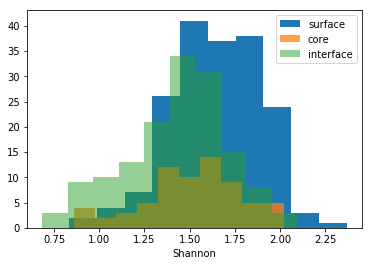

(0.4, 1.6)

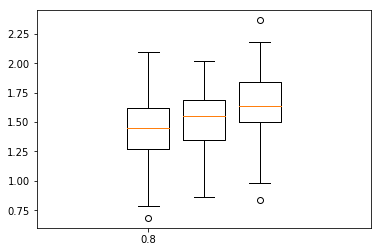

In [37]:
code = 'G5ECF1'
pdb='3zhe_A'
shan = pd.read_table('../Data/Heteromers/'+code+'.shannon')
rate = pd.read_table('../Data/Heteromers/'+code+'.rate')
data = pd.concat([shan, rate], axis=1)

main = readFasta('../Data/Heteromers/G5ECF1.fasta')
sele = readFasta('../Data/Heteromers/surface/3zhe_A.fasta')

surf = pd.read_table('../Data/Heteromers/surface/3zhe_A.surf')

intr = pd.read_table('../Data/Heteromers/out_3zhe_interB/molecule_1.txt', sep=' ', header=-1, names=['aa', 'pos', 'inter'])
intr2 = pd.read_table('../Data/Heteromers/out_3zhe_interD/molecule_1.txt', sep=' ', header=-1, names=['aa', 'pos', 'inter'])

dataDic = {}
for i in data['pos'].index:
    dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
surfDic = {} 
for i in surf['pos'].index:
    surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])
    
intrI = intr['inter'] == 'I'
inter1 = set(intr[intrI]['pos'])

intrI2 = intr2['inter'] == 'I'
inter2 = set(intr2[intrI2]['pos'])

surfHist = tuple(dataDic[i][0] for i in surfDic if surfDic[i] == 1 and i in dataDic and i not in inter1 and i not in inter2)
coreHist = tuple(dataDic[i][0] for i in surfDic if surfDic[i] == 0 and i in dataDic and i not in inter1 and i not in inter2)
intrHist = tuple(dataDic[i][0] for i in surfDic if i in inter1 or i in inter2)

plt.hist(surfHist, label='surface', alpha=1)
plt.hist(coreHist, label='core', alpha=0.75)
plt.hist(intrHist, label='interface', alpha=0.5)
plt.legend()
plt.xlabel('Shannon')
plt.show()

plt.boxplot(surfHist, positions=[1.2])
plt.boxplot(coreHist, positions=[1])
plt.boxplot(intrHist, positions=[0.8])
plt.xlim((0.4, 1.6))

In [324]:

data.head()

,pos,entropy,cons,rad,ratio,norm
0,1,0.693147,253,0,0.000000,-1.000000
1,2,0.792285,28,8,3.500000,0.284205
2,3,0.942664,37,18,2.055556,-0.245784
3,4,1.048767,55,11,5.000000,0.834579
4,5,1.200318,81,39,2.076923,-0.237944


In [326]:
ls ../Data/Heteromers/surface/

1eer_A.fasta*  1efv_A.surf*   2e0x_A.pdb*    3peu_A.fasta*  3zhe_A.surf*
1eer_A.pdb*    1zhi_A.fasta*  2e0x_A.surf*   3peu_A.pdb*
1eer_A.surf*   1zhi_A.pdb*    3a7a_B.fasta*  3peu_A.surf*
1efv_A.fasta*  1zhi_A.surf*   3a7a_B.pdb*    3zhe_A.fasta*
1efv_A.pdb*    2e0x_A.fasta*  3a7a_B.surf*   3zhe_A.pdb*


In [327]:
main = readFasta('../Data/Heteromers/'+code+'.fasta')
sele = readFasta('../Data/Heteromers/surface/'+pdb+'.fasta')

In [328]:
main

'MQKSDEVTEKFKRYCNQLEKYGQTENVHSPVMAMLRRKGRKQLIEIMKRDGDCTSSINKLWIVGYYHPFQFFIRDKEKNMAIAVLLTMFCGELQEMLSLPDDKYPALWNMYIGDFHRYMPDEEIQKCLAVGYYSRAIDLDPNQGRAFHVLAGLRADLNVAQKLRLMILGQLADAPYKKGTELLEYLKFPQKESTDKLMVDFVIWALNEKSKRMDYQMTGIKIVNEFKAEIEQKLEFDWSLIMSTCRLASKLAMKKFGFQQFYNCFDTISTLYITIYSRTISSKCLLAEAISWISDSAEILGHLDEQKNEPHFQKLSVFAKTKWNELNDLVMNHINSVFTSMSLTINPSISMTSFLLNGPISEPNVEFLSQLINYLVSVEFPPMEIIHDREESGPLLRRINQSEQKRLDIQIKTQNDEVNREDWRPVYVLMDYDVIVDKIRIALKIWDIDDFICILPSTVLDELDYQKTKNRAVRPVIRALMELQAEGKIVLKKCDNERSCAEQLVQSARRSAEDHKHIVAFLCKNPSEQKEMEGVTFYDIDQFYMKYLE'

In [329]:
def findSeq(query, seq):
    pos = seq.find(query[:10])
    return pos

In [330]:
findSeq(sele, main)

1

In [331]:
surf = pd.read_table('../Data/Heteromers/surface/'+pdb+'.surf')
surf.head()

,aa,pos,surface
0,PHE,312,1
1,ASP,214,1
2,SER,243,0
3,PHE,236,1
4,GLU,92,1


In [332]:
ls ../Data/Heteromers/out_3zhe_interB/


In [337]:
intr = pd.read_table('../Data/Heteromers/out_'+pdb[:4]+'_interB/molecule_1.txt', sep=' ', header=-1, names=['aa', 'pos', 'inter'])
intr.head()

,aa,pos,inter
0,A,370,I
1,A,359,I
2,A,136,I
3,A,100,I
4,A,123,C


In [338]:
dataDic = {}
for i in data['pos'].index:
    dataDic[data.iloc[i]['pos']] = (data.iloc[i]['entropy'], data.iloc[i]['norm'])
surfDic = {} 
for i in surf['pos'].index:
    surfDic[surf.iloc[i]['pos']] = (surf.iloc[i]['surface'])

In [339]:
intrI = intr['inter'] == 'I'
inter = set(intr[intrI]['pos'])

In [340]:
surfHist = tuple(dataDic[i][0] for i in surfDic if surfDic[i] == 1 and i in dataDic and i not in inter)
coreHist = tuple(dataDic[i][0] for i in surfDic if surfDic[i] == 0 and i in dataDic and i not in inter)
intrHist = tuple(dataDic[i][0] for i in surfDic if i in inter)

Text(0.5,0,'Shannon')

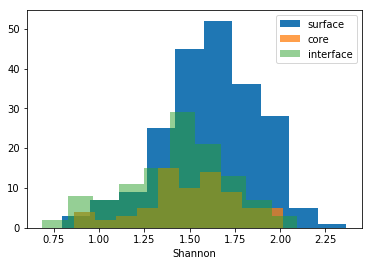

In [341]:
plt.hist(surfHist, label='surface', alpha=1)
plt.hist(coreHist, label='core', alpha=0.75)
plt.hist(intrHist, label='interface', alpha=0.5)
plt.legend()
plt.xlabel('Shannon')

{'boxes': [<matplotlib.lines.Line2D at 0x7fa1c1788b00>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa1c178d7b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa1c1792470>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa1c178dd30>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa1c1788f28>,
  <matplotlib.lines.Line2D at 0x7fa1c178d390>]}

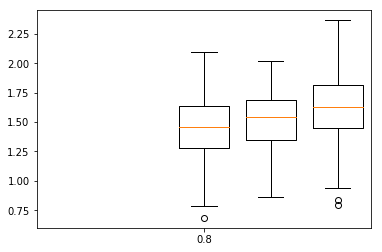

In [349]:
plt.boxplot(surfHist, positions=[1.2])
plt.boxplot(coreHist)
plt.boxplot(intrHist, positions=[0.8])